In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


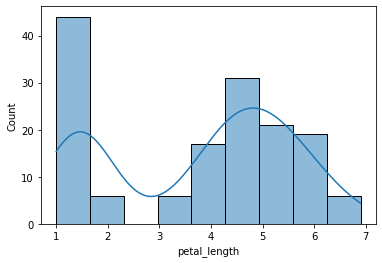

In [5]:
# Use the iris database to answer the following quesitons:

# 1. What does the distribution of petal lengths look like?

iris = sns.load_dataset('iris')
print(iris.head())
sns.histplot(iris.petal_length, kde=True)
plt.show()

Text(6.799999999999997, 0.5, 'Petal Width')

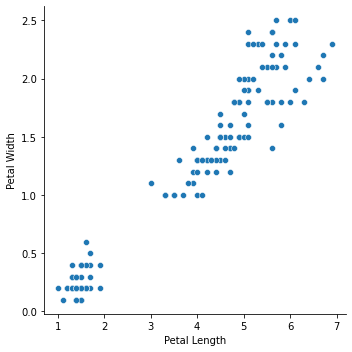

In [10]:
# 2. Is there a correlation between petal length and petal width? 
# Use http://guessthecorrelation.com/ as a hint to how we could visually 
# determine if a correlation exists between two numeric columns.

sns.relplot(x='petal_length', y='petal_width',  data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# Yes there is a correlation of about 0.9.

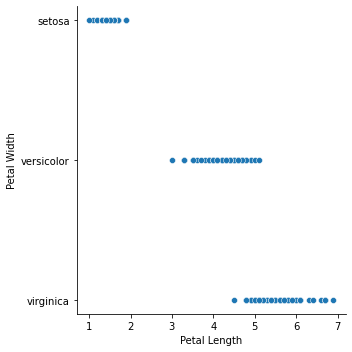

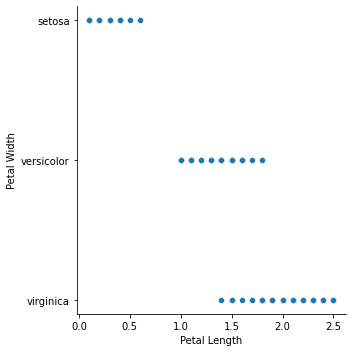

In [25]:
# 3. Would it be reasonable to predict species based on sepal width and 
# sepal length? For this, you'll visualize two numeric columns through 
# the lense of a categorical column.

sns.relplot(x='petal_length', y='species', data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

sns.relplot(x='petal_width', y='species', data=iris)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

In [ ]:
# 4. Which features would be best used to predict species?

# The Petal Legnth and Petal Width would be the best way to predict the species.
# (see graph above)

In [31]:
# 1. Using the lesson as an example, use seaborn's load_dataset function to load
# the anscombe data set. Use pandas to group the data by the dataset 
# column, and calculate summary statistics for each dataset. 
# What do you notice?

anscombe = sns.load_dataset('anscombe')

print(anscombe.groupby('dataset').x.agg('mean'))
print(anscombe.groupby('dataset').x.agg('sum'))
print(anscombe.groupby('dataset').x.agg('min'))
print(anscombe.groupby('dataset').x.agg('max'))

print(anscombe.groupby('dataset').y.agg('mean'))
print(anscombe.groupby('dataset').y.agg('sum'))
print(anscombe.groupby('dataset').y.agg('min'))
print(anscombe.groupby('dataset').y.agg('max'))

dataset
I      9.0
II     9.0
III    9.0
IV     9.0
Name: x, dtype: float64
dataset
I      99.0
II     99.0
III    99.0
IV     99.0
Name: x, dtype: float64
dataset
I      4.0
II     4.0
III    4.0
IV     8.0
Name: x, dtype: float64
dataset
I      14.0
II     14.0
III    14.0
IV     19.0
Name: x, dtype: float64
dataset
I      7.500909
II     7.500909
III    7.500000
IV     7.500909
Name: y, dtype: float64
dataset
I      82.51
II     82.51
III    82.50
IV     82.51
Name: y, dtype: float64
dataset
I      4.26
II     3.10
III    5.39
IV     5.25
Name: y, dtype: float64
dataset
I      10.84
II      9.26
III    12.74
IV     12.50
Name: y, dtype: float64


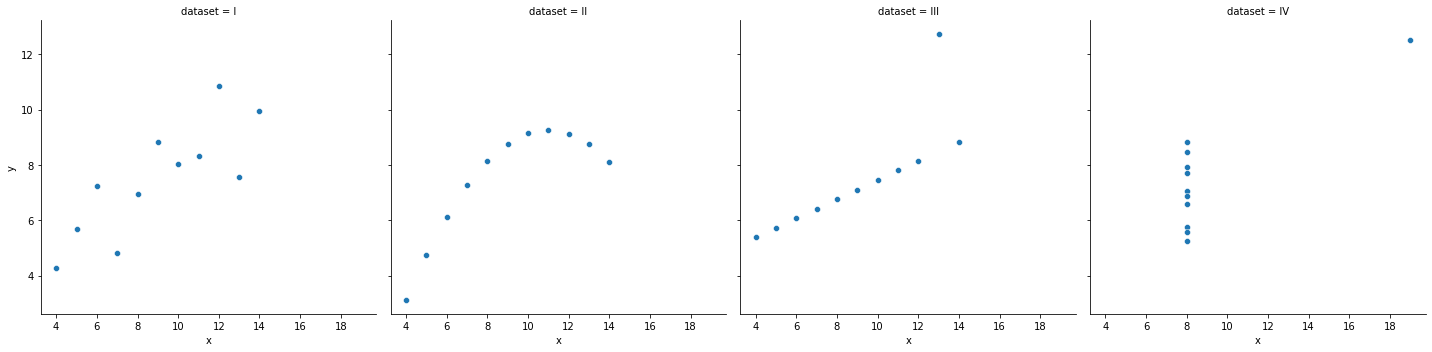

In [41]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(x='x', y='y', col='dataset', data=anscombe)

In [44]:
# 2. Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.

insect_spray = data('InsectSprays')
insect_spray.dtypes

count     int64
spray    object
dtype: object

Text(0.5, 1.0, 'Effectiveness of Insect Sprays')

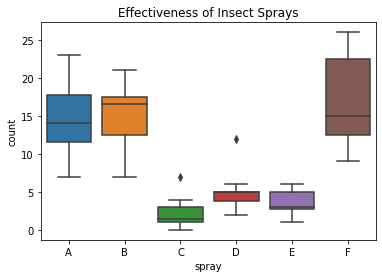

In [46]:
sns.boxplot(data=insect_spray, y='count', x='spray')
plt.title('Effectiveness of Insect Sprays')

In [77]:
# 3. Load the swiss dataset and read it's documentation. 
# The swiss dataset is available from pydatset rather than seaborn. 
# Create visualizations to answer the following questions:

swiss = data('swiss')
swiss.Catholic.mean()
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [63]:
# Create an attribute named is_catholic that holds a boolean value of 
# whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss.Catholic.mean()
swiss['is_catholic'] = swiss.Catholic > 50

Text(0.5, 15.0, 'Is Catholic')

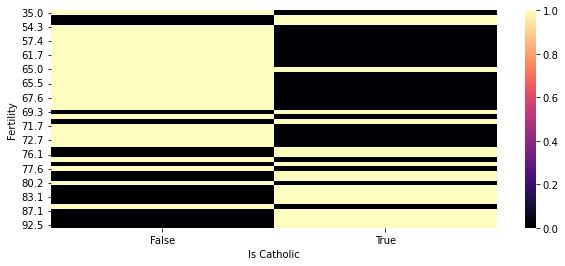

In [71]:
# Does whether or not a province is Catholic influence fertility?

cath_fer = pd.crosstab(swiss.Fertility, swiss.is_catholic)
plt.figure(figsize = (10,4))
sns.heatmap(cath_fer, cmap=plt.cm.magma)
plt.xlabel('Is Catholic')

<AxesSubplot:>

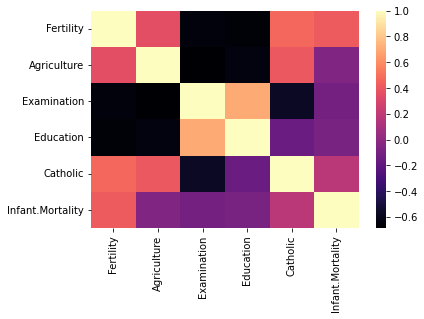

In [82]:
# What measure correlates most strongly with fertility?
swiss_corr = swiss.corr()
sns.heatmap(swiss_corr, cmap=plt.cm.magma)

In [163]:
# 4. Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items and the 
# revenue produced by each.

import env
user = env.user
host = env.host
password = env.password
import os
os.path.exists('env.py')
def get_db_url(db, env_file=os.path.exists('env.py')):
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
        
url = get_db_url('chipotle')
chipotle = pd.read_sql('SELECT * FROM orders', url)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [164]:
chipotle['item_price'] = chipotle['item_price'].str.strip('$')
chipotle['item_price'] = chipotle['item_price'].str.strip().astype('float')

top_four_items = chipotle.groupby('item_name').agg({'item_price':'sum', 'quantity':'sum'}).nlargest(4, columns='quantity')

Text(0, 0.5, 'Item revenue')

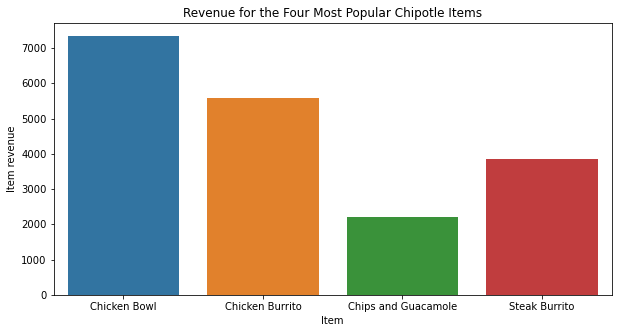

In [166]:
plt.figure(figsize = (10, 5))

sns.barplot(data=top_four_items, x=top_four_items.index,  y='item_price')

plt.title('Revenue for the Four Most Popular Chipotle Items')
plt.xlabel('Item')
plt.ylabel('Item revenue')

In [184]:
# 5. Load the sleepstudy data and read it's documentation. 
# Use seaborn to create a line chart of all the individual subject's 
# reaction times and a more prominant line showing the average change 
# in reaction time.

sleep_study = data("sleepstudy")

In [171]:
mean_reaction = sleep_study.groupby('Days').agg({'Reaction':'mean'})
mean_reaction

,Reaction
Days,
0,256.651806
1,264.495756
2,265.361900
3,282.992011
4,288.649422
5,308.518456
6,312.178256
7,318.750583
8,336.629506


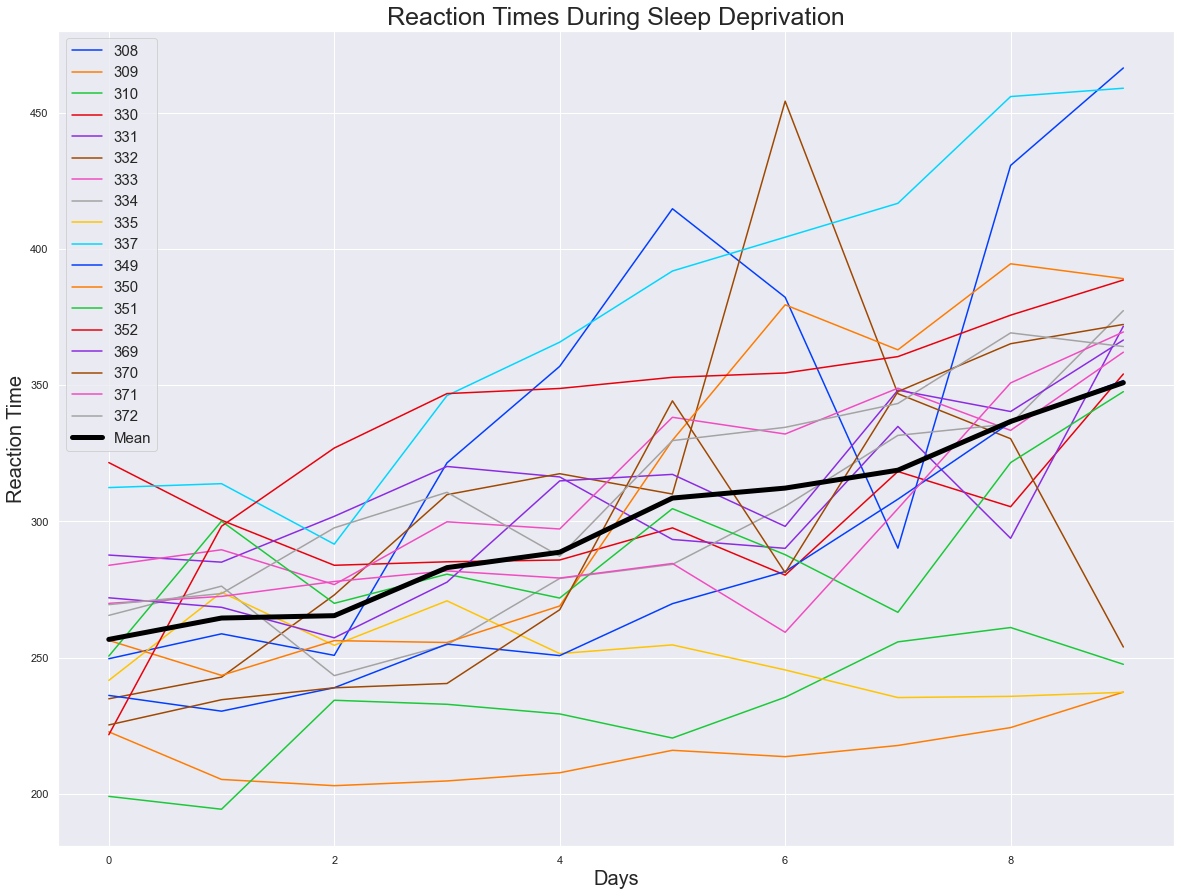

In [197]:
# setting a color scheme with the number of subjects to a variable
palette = sns.color_palette("bright", 18)
# setting the figure size to better see all the data
plt.figure(figsize = (20, 15))


sns.lineplot(data=sleep_study, x='Days', y='Reaction', hue='Subject', palette=palette, legend='full')
# plotting a second line to show the mean of the data, also increased the width of the line to see easier
plt.plot(mean_reaction.index, mean_reaction['Reaction'], c='black', linewidth = 5, label='Mean')

plt.title('Reaction Times During Sleep Deprivation', fontsize=25)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Reaction Time', fontsize=20)
plt.legend(fontsize=15)
plt.show()
